## Controls

- Timing
  - grid
    - mapping
    - slider bending factor
  - offset (applied after grid)
    - choose: msecs, or % of beat
- Velocity
  - envelope
  - accentuation rules from phrasing / articulation
    - pitch peak
- Chaotic variation

In [15]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

In [231]:
def norm(a):
    cs = np.cumsum(a)
    cycle_len = cs[-1]
    cs = np.insert(cs, 0, 0)
    #cs = np.delete(cs, -1)
    return cs / cycle_len * 8

In [232]:
fully_swung = norm([2, 1, 2, 1, 2])
fully_swung

array([0., 2., 3., 5., 6., 8.])

In [240]:
# even = np.linspace(0, 8, num=6, endpoint=True)
even = norm([1, 1, 2, 1, 1])
even

array([0.        , 1.33333333, 2.66666667, 5.33333333, 6.66666667,
       8.        ])

In [234]:
quavers = np.arange(0, 9)
onbeats = np.arange(0, 9, step=2)
offbeats = np.arange(1, 8, step=2)
onbeats, offbeats, quavers

(array([0, 2, 4, 6, 8]),
 array([1, 3, 5, 7]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]))

In [256]:
percent = 33
smoothed = np.average([fully_swung, even], weights=[percent, 100 - percent], axis=0)
#smoothed = even
smoothed

array([0.        , 1.55333333, 2.77666667, 5.22333333, 6.44666667,
       8.        ])

In [257]:
linear = interp1d(fully_swung, smoothed)
cubic = interp1d(fully_swung, smoothed, kind='cubic')
many = np.linspace(0, 8, num=50)
# cubic(many)

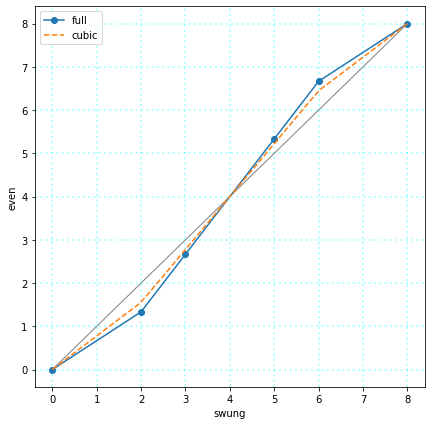

In [259]:
import matplotlib.ticker as plticker

fig = plt.figure(figsize=(7,7))
ax = plt.axes()

loc = plticker.MultipleLocator(base=1)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)

#plt.plot(quavers, linear(quavers), 'o')
plt.plot(fully_swung, even, 'o-', label='full')
plt.plot(many, many, color='grey', linestyle='-', linewidth=1)
plt.plot(many, linear(many), linestyle='--', label='cubic')
plt.xlabel('swung')
plt.ylabel('even')
plt.grid(b=True, color='aqua', alpha=0.3, linestyle=':', linewidth=2, markevery=1)
plt.legend()
plt.show()

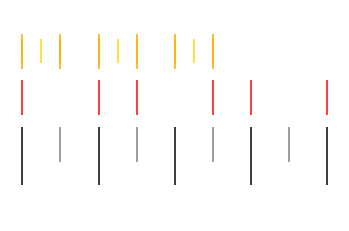

In [224]:
plt.figure()
# plt.hlines(1,0,8)  # Draw a horizontal line
plt.eventplot(onbeats, orientation='horizontal', colors='black', linelengths=0.5)
plt.eventplot(offbeats, orientation='horizontal', colors='grey', linelengths=0.3, lineoffsets=1.1)
plt.eventplot(linear(quavers), orientation='horizontal', colors='gold', linelengths=0.2, lineoffsets=1.9)
plt.eventplot(even, orientation='horizontal', colors='orange', linelengths=0.3, lineoffsets=1.9)
plt.eventplot(fully_swung, orientation='horizontal', colors='red', linelengths=0.3, lineoffsets=1.5)
# plt.eventplot(np.average(even, fully_swung), orientation='horizontal', colors='cyan', linelengths=0.3, lineoffsets=1.5)
plt.axis('off')
plt.show()